# Correlation Data Analysis

### Import Data and Libraries

In [80]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [81]:
df_data = pd.read_csv('../data/year_data/2018-01-01_2018-08-30.csv')

### Supporting Functions

#### Energy Consumption Column 

In [82]:
# Return a Dataframe of building energy consumption totals from Jan 1, Aug 30
def get_bldg_totals():
    df_data = pd.read_csv('../data/year_data/2018-01-01_2018-08-30.csv')
    bldg_totals = df_data.sum()[1:]
    bldg_totals = bldg_totals.divide(4)
    return pd.DataFrame(bldg_totals)

# df - Dataframe to update
# bldg_totals - Dataframe of Buildings and their energy consumption
# If a building in the dataframe is found in the building list then its energy consumption total will be updated
def update_energy_cons(df, bldg_totals):
    matches = []
    for i in range(df_corr.shape[0]):
        curr_bldg = remove_zero(df_corr['Facility'][i])
        for j in range(bldg_totals.shape[0]):
            if curr_bldg == remove_zero(bldg_totals.iloc[j].name[1:]):
                df_corr['Energy Cons'][i] = bldg_totals.iloc[j][0]
                matches.append(curr_bldg)
    print("Number of Matched and Updated Buildings: " + str(len(matches)))
    
# df - dataframe
# Adds Energy Column with the appropriate total. Removes rows that do not have an energy total
def add_energy_cons_col(df): 
    # Create Energy Consumption Row - Initialize with 0's (Will be Updated)
    df['Energy Cons'] = df['Constr Cost'].apply(lambda x: 0)
    # Get Bldg Total Energy Usage (Dataframe) from Jan - Aug 2018
    bldg_totals = get_bldg_totals()
    # If a building in the dataframe is found in the building list then its energy consumption total will be updated
    update_energy_cons(df, bldg_totals)
    return df

#### Utitlity Functions

In [83]:
# Remove the Leading 0's in a String
def remove_zero(string):
    if string[0] != '0': return string
    return remove_zero(string[1:])

#### Dataframe Manipulation

In [84]:
# df - Dataframe that contains a 'RI-Aux-Other' Column
# Split the Research/Aux/Other Column
def split_RAO(df):
    df['RI'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[0]))
    df['Aux'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[1]))
    df['Other'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[2]))
    df = df.drop(['RI-Aux-Other'], axis=1)
    return df
    
# col_list - List of Column Labels to Convert to String
# df - dataframe
# Convert Categorical Columns Into Strings
def convert_col_to_string(df, col_list):
    for i in col_list: df[i] = df[i].apply(lambda x: str(x))
    return df

#### Plotting

In [85]:
# df - Dataframe of Correlations
# Plots Seaborn Heatmap of Correlation. Hides Redundant Squares
def plot_corr_heatmap(df):
    mask = np.zeros_like(df_corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
         ax = sns.heatmap(df_corr, mask=mask, square=False, linewidths=.5, vmin=-1, vmax=1, cmap="Reds")
            
# df_corr - Dataframe with Correlations
# df_orig - Dataframe with Original Data
# x_label - The X-Label for all Scatter Plots
# Plots a scatter plot of the all of the columns in df_corr in respect to each other
def plot_corr_scatter(df_corr, df_orig, x_label):
    correlation_col = df_corr.corr().columns.values
    for i in correlation_col:
        if i != x_label:
            plt.scatter(x=df_corr_orig[x_label].values,
                        y=df_corr_orig[i].values)
            plt.title('Scatter Plot of Energy Consumption and ' + i)
            plt.xlabel(x_label)
            plt.ylabel(i)
            plt.show()
            
# df - Dataframe with Correlations
# df_orig - Dataframe with Original Data
# x_label - The X-Label for all Scatter Plots
# Plots a scatter plot of the all of the columns in df_corr in respect to each other
def plot_corr_scatter_sns(df_corr, df_orig, x_label, hue, fit_reg=False):
    correlation_col = df_corr.corr().columns.values
    for i in correlation_col:
        if i != x_label:
            ax = sns.lmplot(x=x_label, y=i, data=df_orig, hue=hue, fit_reg=fit_reg)
            plt.title('Scatter Plot of ' + x_label + ' and ' + i)
            plt.show()

### Original Building Metadata Dataframe

In [86]:
# Importing the Complete Building Metadata dataset
df_bldg = pd.read_csv('../data/bldg_info.csv')

In [87]:
df_bldg.columns.values

array(['Site', 'Facility', 'Name', 'Type', 'Category', 'Area', 'Status',
       'Ownership', 'Primary Use', 'Condition', 'Named For',
       'Constr Date', 'Occup Date', 'Architect', 'Contractor',
       'Constr Cost', 'GT Category', 'FIR Cong Dist', 'On Campus (IRP)',
       'FIR Constr Type', 'FIR Name', 'FIR Proj No', 'Address',
       'RI-Aux-Other', 'ASF', 'NonASF', 'FIR Pct Renov', 'Avg cost/sf',
       'FIR year renov', 'Demo', 'Cty/dorm/apt/hse', 'Remarks'],
      dtype=object)

In [88]:
df_bldg

,Site,Facility,Name,Type,Category,Area,Status,Ownership,Primary Use,Condition,...,Address,RI-Aux-Other,ASF,NonASF,FIR Pct Renov,Avg cost/sf,FIR year renov,Demo,Cty/dorm/apt/hse,Remarks
0,MainGT,002,"Skiles, William Vernon Classroom Building",BUILDING,M,139914,A,1,2,REM26-50,...,686 Cherry St,100-000-000,71356.0,55115,43.0,175,1/1/1995 0:00,NaN,060/ - / - / -,Ground floor extended for bookstore 1962 or 63?
1,MainGT,003,"Robert, L.W. Alumni House",BUILDING,M,25645,A,1,1,SATIS,...,190 North Avenue,050-000-050,15982.0,4698,100.0,160,1/1/1979 0:00,NaN,060/ - / - / -,RI UPDATE 11/18/11
2,MainGT,006,"Smith, John M. Residence Hall",BUILDING,M,63848,A,1,23,SATIS,...,630 Williams St,001-099-000,40141.0,15015,60.0,160,1/1/1993 0:00,NaN,060/0283-0283/0001-0001/ -,Exercise/sunroom addition 1993? 1% RI - AVPFAC...
3,MainGT,007,"Brown, Julius Residence Hall",BUILDING,M,17423,A,1,22,SATIS,...,625 Techwood Dr,001-099-000,10985.0,3267,60.0,130,1/1/1993 0:00,NaN,060/0089-0089/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat..."
4,MainGT,010,"Howell, Clark Residence Hall",BUILDING,M,23933,A,1,22,SATIS,...,640 Williams St,001-099-000,14697.0,6012,80.0,130,1/1/1999 0:00,NaN,060/0122-0122/ - / -,"1% RI - AVPFAC request 2/2011, Steam/chill wat..."
5,MainGT,011,"Harris, Nathanial E. Residence Hall",BUILDING,M,25558,A,1,22,SATIS,...,633 Techwood Dr,001-099-000,13240.0,8230,100.0,130,1/1/1992 0:00,NaN,060/0092-0092/0000-0000/ -,Attic space renovated 1970 or 71? 1% RI - AVPF...
6,MainGT,012,"Brittain, Marion L. Dining Hall",BUILDING,M,19986,A,1,8,SATIS,...,649 Techwood Dr,000-100-000,14280.0,2415,60.0,160,1/1/2001 0:00,NaN,060/ - / - / -,NaN
7,MainGT,013,"Cloudman, Josiah Residence Hall",BUILDING,M,23117,A,1,22,SATIS,...,661 Techwood Dr,001-099-000,13832.0,5204,60.0,130,1/1/1995 0:00,NaN,060/0117-0117/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat..."
8,MainGT,014,"Harrison, George W. Jr. Residence Hall",BUILDING,M,30526,A,1,22,SATIS,...,660 Williams St,001-099-000,19616.0,6095,80.0,130,1/1/1998 0:00,NaN,060/0151-0151/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat..."
9,MainGT,015,"Towers, Donigan D. Residence Hall",BUILDING,M,59986,A,1,23,SATIS,...,112 Bobby Dodd W,001-099-000,29971.0,21864,100.0,130,1/1/2014 0:00,NaN,060/0254-0254/0001-0001/ -,"1% RI - AVPFAC request 3/2011, Steam/chill wat..."


### Prepare Correlation Matrix Dataframe

In [89]:
# Importing the dataset
df_corr = pd.read_csv('../data/bldg_info_corr.csv')

# Split the Research/Aux/Other Column and Remove Irrelevant Columns
df_corr = split_RAO(df_corr)
df_corr = df_corr.drop(['Constr Date', 'Occup Date', 'FIR year renov', 'Renov Date Num', 'FIR Pct Renov', 'Occup Date Num'], axis=1)

# Convert Categorical Columns Into Strings
df_corr = convert_col_to_string(df_corr, ['Ownership', 'Primary Use','FIR Constr Type'])

# Drop Stadium Row
df_corr = df_corr.drop(df_corr.loc[df_corr['Facility'] == '17'].index[0])
df_corr = df_corr.reset_index().drop(['index'], axis=1)

# Numerical Label Conditions
#cond_dict = {'REM>51': 1, 'REM26-50': 2, 'REM<26': 3, 'SATIS': 4}
#for i in range(df_corr.shape[0]): df_corr.at[i, 'Condition'] = cond_dict.get(df_corr['Condition'][i])

In [90]:
df_corr

,Facility,Area,Ownership,Primary Use,Condition,Constr Date Num,Constr Date Replaced,Constr Replaced pct,Constr Cost,GT Category,FIR Constr Type,ASF,Avg cost/sf,RI,Aux,Other
0,2,139914,1,2,REM26-50,21551,34700,27205.07,2037000,ACADI&R,7,71356.0,175,100,0,0
1,3,25645,1,1,SATIS,4019,28856,28856.00,1142000,CAMPSUPP,7,15982.0,160,50,0,50
2,6,63848,1,23,SATIS,17168,33970,27249.20,614000,RESIDENT,7,40141.0,160,1,99,0
3,7,17423,1,22,SATIS,9133,33970,24035.20,93000,RESIDENT,7,10985.0,130,1,99,0
4,10,23933,1,22,SATIS,14246,36161,31778.00,163000,RESIDENT,7,14697.0,130,1,99,0
5,11,25558,1,22,SATIS,9498,33604,33604.00,534000,RESIDENT,7,13240.0,130,1,99,0
6,12,19986,1,8,SATIS,10228,36892,26226.40,418000,STUDSUPP,7,14280.0,160,0,100,0
7,13,23117,1,22,SATIS,11324,34700,25349.60,128000,RESIDENT,7,13832.0,130,1,99,0
8,14,30526,1,22,SATIS,14246,35796,31486.00,183000,RESIDENT,7,19616.0,130,1,99,0
9,15,59986,1,23,SATIS,17168,41640,41640.00,481000,RESIDENT,7,29971.0,130,1,99,0


In [91]:
# Adds Energy Column ands the appropriate total. Removes rows that do not have an energy total
df_corr = add_energy_cons_col(df_corr)

Number of Matched and Updated Buildings: 108


In [92]:
# Create Energy Consumption Row - Initialize with 0's (Will be Updated)
df_corr['Energy Cons by ASF'] = df_corr['Energy Cons'] / df_corr['ASF']
df_corr['Energy Cons by ASF'].fillna((df_corr['Energy Cons by ASF'].mean()), inplace=True)

In [93]:
# Drop Rows that have total Energy Consumption Equal to 0 and Remove Columns
df_corr = df_corr[df_corr['Energy Cons'] != 0]
df_corr = df_corr.drop(['Facility'], axis = 1)

In [94]:
# Orignial Correlation Dataframe Columns
print(df_corr.columns.values)
df_corr

['Area' 'Ownership' 'Primary Use' 'Condition' 'Constr Date Num'
 'Constr Date Replaced' 'Constr Replaced pct' 'Constr Cost' 'GT Category'
 'FIR Constr Type' 'ASF' 'Avg cost/sf' 'RI' 'Aux' 'Other' 'Energy Cons'
 'Energy Cons by ASF']


,Area,Ownership,Primary Use,Condition,Constr Date Num,Constr Date Replaced,Constr Replaced pct,Constr Cost,GT Category,FIR Constr Type,ASF,Avg cost/sf,RI,Aux,Other,Energy Cons,Energy Cons by ASF
0,139914,1,2,REM26-50,21551,34700,27205.07,2037000,ACADI&R,7,71356.0,175,100,0,0,631054,8.843741
1,25645,1,1,SATIS,4019,28856,28856.00,1142000,CAMPSUPP,7,15982.0,160,50,0,50,386767,24.200163
2,63848,1,23,SATIS,17168,33970,27249.20,614000,RESIDENT,7,40141.0,160,1,99,0,404267,10.071174
3,17423,1,22,SATIS,9133,33970,24035.20,93000,RESIDENT,7,10985.0,130,1,99,0,101355,9.226673
4,23933,1,22,SATIS,14246,36161,31778.00,163000,RESIDENT,7,14697.0,130,1,99,0,297331,20.230727
5,25558,1,22,SATIS,9498,33604,33604.00,534000,RESIDENT,7,13240.0,130,1,99,0,107540,8.122356
6,19986,1,8,SATIS,10228,36892,26226.40,418000,STUDSUPP,7,14280.0,160,0,100,0,500965,35.081583
7,23117,1,22,SATIS,11324,34700,25349.60,128000,RESIDENT,7,13832.0,130,1,99,0,127650,9.228600
8,30526,1,22,SATIS,14246,35796,31486.00,183000,RESIDENT,7,19616.0,130,1,99,0,155440,7.924144
9,59986,1,23,SATIS,17168,41640,41640.00,481000,RESIDENT,7,29971.0,130,1,99,0,891414,29.742551


In [95]:
df_corr_orig = df_corr
df_corr = df_corr.corr()
# Create Correlation Matrix
print(df_corr.columns.values)
df_corr

['Area' 'Constr Date Num' 'Constr Date Replaced' 'Constr Replaced pct'
 'Constr Cost' 'ASF' 'Avg cost/sf' 'RI' 'Aux' 'Other' 'Energy Cons'
 'Energy Cons by ASF']


,Area,Constr Date Num,Constr Date Replaced,Constr Replaced pct,Constr Cost,ASF,Avg cost/sf,RI,Aux,Other,Energy Cons,Energy Cons by ASF
Area,1.000000,0.396015,0.045331,0.098306,0.713322,0.981279,0.161304,-0.001607,0.069232,-0.114918,0.065590,-0.052322
Constr Date Num,0.396015,1.000000,0.224219,0.366552,0.510961,0.447715,0.120196,-0.075930,-0.016515,0.162856,0.180277,-0.166167
Constr Date Replaced,0.045331,0.224219,1.000000,0.897091,0.202591,0.046606,-0.083318,-0.315487,0.224008,0.178877,0.039698,-0.104893
Constr Replaced pct,0.098306,0.366552,0.897091,1.000000,0.285890,0.104904,0.014871,-0.200802,0.073011,0.232190,0.087004,-0.080695
Constr Cost,0.713322,0.510961,0.202591,0.285890,1.000000,0.725515,0.190907,0.096029,-0.067610,-0.055424,0.352486,-0.027339
ASF,0.981279,0.447715,0.046606,0.104904,0.725515,1.000000,0.175517,-0.009132,0.060625,-0.086675,0.387033,-0.098065
Avg cost/sf,0.161304,0.120196,-0.083318,0.014871,0.190907,0.175517,1.000000,0.414877,-0.379840,-0.090192,0.064385,0.530295
RI,-0.001607,-0.075930,-0.315487,-0.200802,0.096029,-0.009132,0.414877,1.000000,-0.835288,-0.353926,0.186724,0.092224
Aux,0.069232,-0.016515,0.224008,0.073011,-0.067610,0.060625,-0.379840,-0.835288,1.000000,-0.218595,-0.154673,-0.075125
Other,-0.114918,0.162856,0.178877,0.232190,-0.055424,-0.086675,-0.090192,-0.353926,-0.218595,1.000000,-0.068291,-0.035887


### Correlation Between Continuous Columns

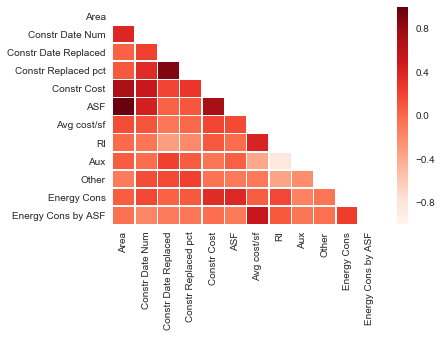

In [96]:
# Plot Correlation Heatmap
plot_corr_heatmap(df_corr)

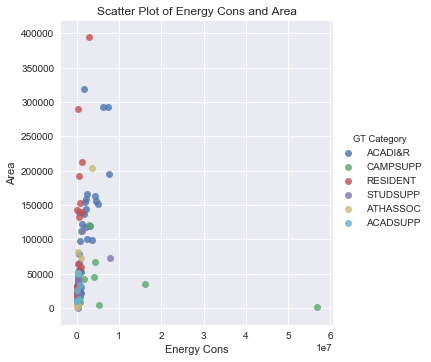

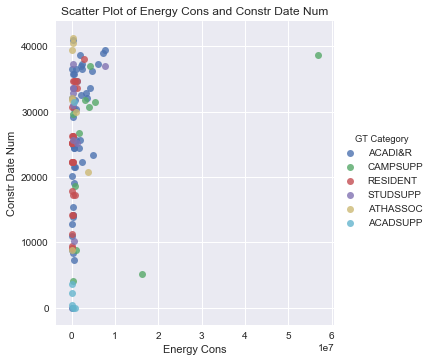

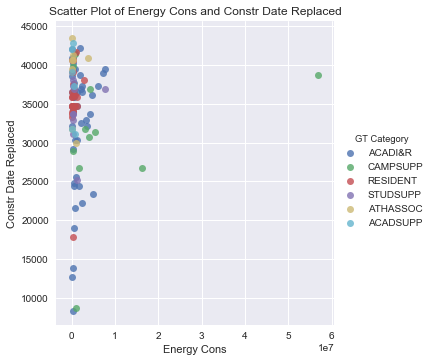

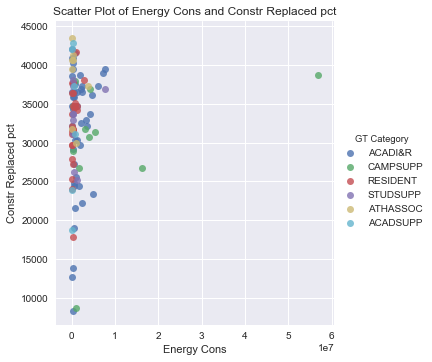

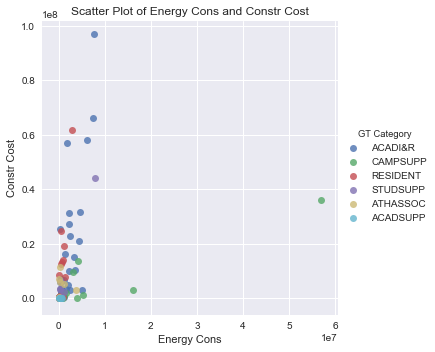

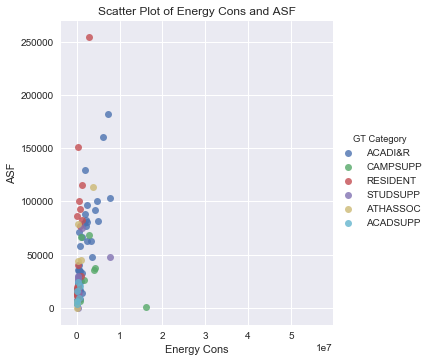

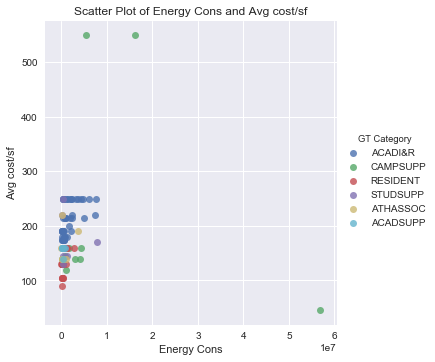

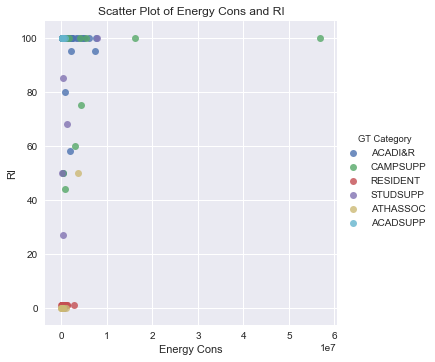

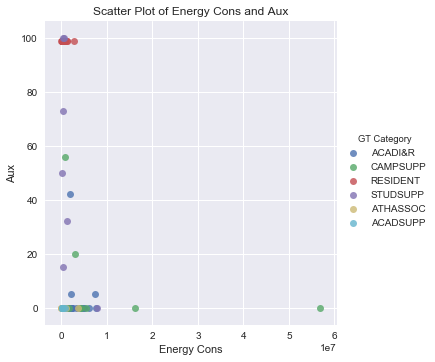

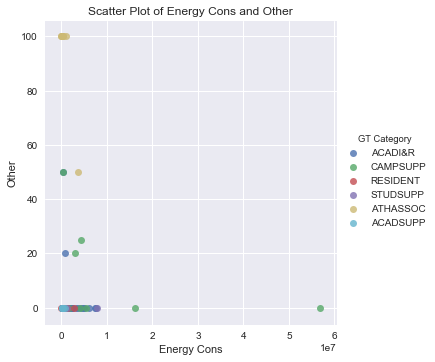

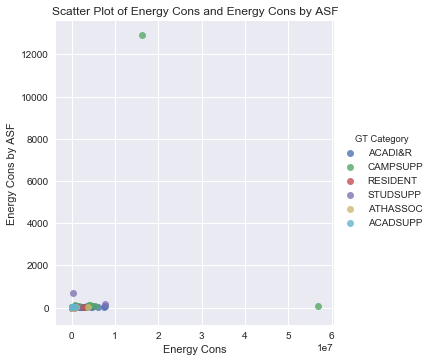

In [97]:
# Plots a scatter plot of the all of the columns in df_corr in respect to each other
plot_corr_scatter_sns(df_corr, df_corr_orig, 'Energy Cons', hue='GT Category')

### Correlation Between Categorical and Continuous Columns

####  Condition Analysis

In [98]:
import warnings
warnings.filterwarnings(action='ignore') # action='once' or 'ignore'

In [99]:
# Returns an Array with all possible types for a Categorical Variable in a Dataframe
# param df (dataframe) - dataframe to search in
# param cat_col (str) - Dataframe column with the Categories
def get_cat_list(df, col_name):
    return list(df[col_name].value_counts().index)

# Creates an Array for Each Category Type, the Array Contains all Continous elements that have that type
# param df (dataframe) - dataframe to search in
# param cat_col (str) - Dataframe column with the Categories
# param val_col (str) - Dataframe column with the Values
# returns arr_2d (2d Arr)
def cat_cont_analysis(df, cat_col, val_col):
    cat_list = get_cat_list(df, cat_col)
    arr_2d = [[] for i in range(len(cat_list))]
    types = df[cat_col].reset_index().drop(columns=['index'])
    values = df[val_col].reset_index().drop(columns=['index'])
    for i in range(df_corr_orig.shape[0]): arr_2d[cat_list.index(types[cat_col][i])].append(values[val_col][i])
    return arr_2d

# Plots the Category Distributions of an associated continuous value
# param df (dataframe) - dataframe to search in
# param cat_col (str) - Dataframe column with the Categories
# param arr_2d (2d Arr) - Array of Arrays with Values for Each Category Type
def plot_cat_dist(df, cat_col, arr_2d):
    cat_list = get_cat_list(df_corr_orig, cat_col)
    for i in range(len(arr_2d)):
        sns.distplot(arr_2d[i]).set_title(cat_list[i])
        plt.show()

# Plots the Category Distributions of an associated continuous value
# param df (dataframe) - dataframe to search in
# param cat_col (str) - Dataframe column with the Categories
# param val_col (str) - Dataframe column with the Values
def cat_dist(df, cat_col, val_col):
    arr_2d = cat_cont_analysis(df, cat_col, val_col)
    plot_cat_dist(df, cat_col, arr_2d)

# Plots the Frequency Distribution of a Categorical Column in a Dataframe
# param df (dataframe) - dataframe to search in
# param cat_col (str) - Dataframe column with the Categories
def freq_dist(df, cat_col):
    cond_count = df[cat_col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cond_count.index, cond_count.values, alpha=0.9)
    plt.title(cat_col +' Distribution')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(cat_col, fontsize=12)
    plt.show()

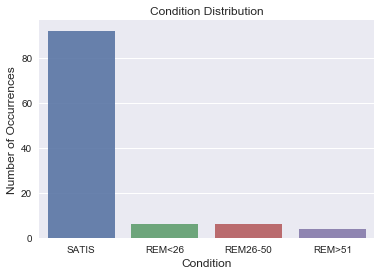

In [100]:
freq_dist(df_corr_orig, 'Condition')

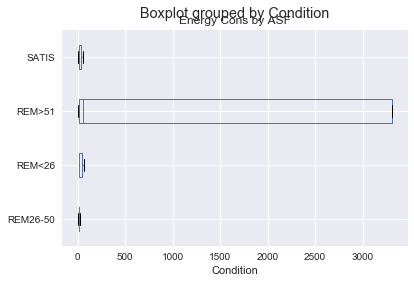

In [101]:
# Box Plot
# Box Plot
fig, ax = plt.subplots()
df_corr_orig.boxplot('Energy Cons by ASF','Condition', vert=False, ax=ax, sym='')
plt.show()

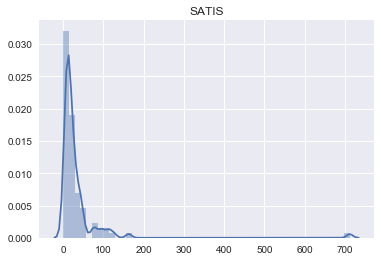

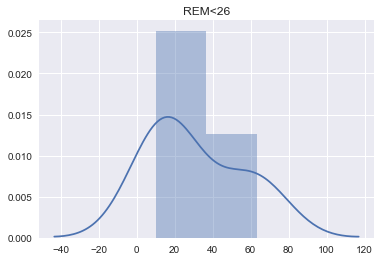

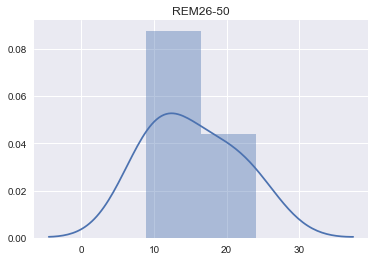

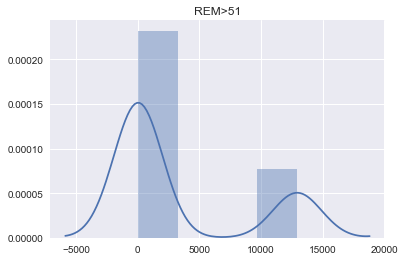

In [102]:
cat_dist(df_corr_orig, 'Condition', 'Energy Cons by ASF')

#### GT Category Analysis

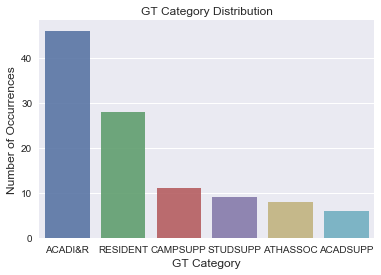

In [103]:
freq_dist(df_corr_orig, 'GT Category')

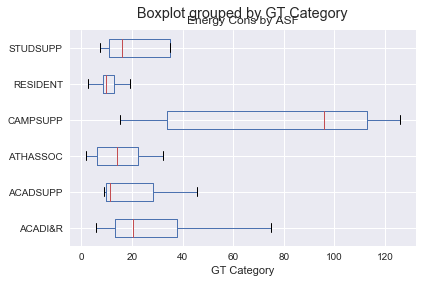

In [104]:
# Box Plot
fig, ax = plt.subplots()
df_corr_orig.boxplot('Energy Cons by ASF','GT Category', vert=False, ax=ax, sym='')
ax.margins(y=500000)
plt.show()

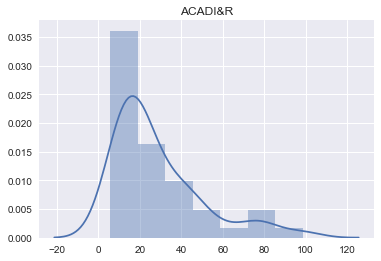

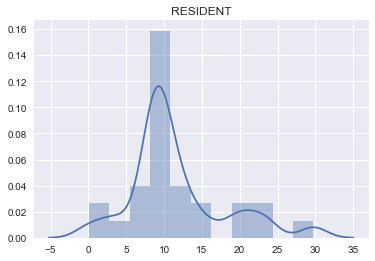

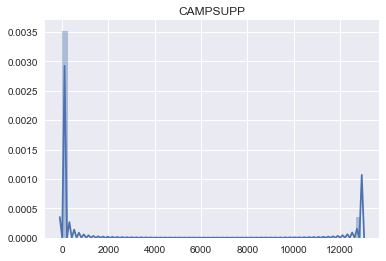

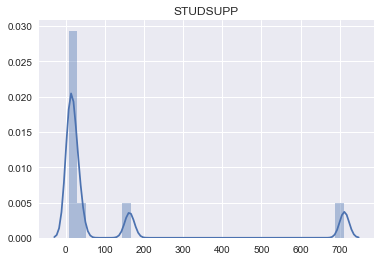

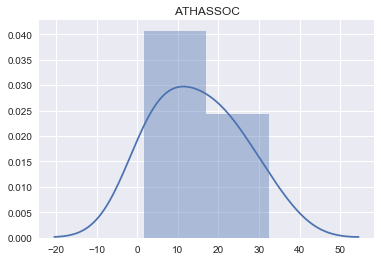

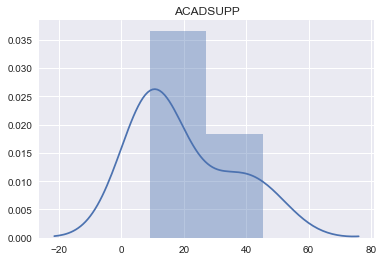

In [105]:
cat_dist(df_corr_orig, 'GT Category', 'Energy Cons by ASF')